In [1]:
from google.colab import drive
%pip install ipython-sql sqlalchemy
%load_ext sql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:0000:01


In [10]:
engine = create_engine('sqlite://')


id_url = '1WqC-d2M_ESiWMF8hhOmqtwaryFUVjoNc'
url_file = f'https://drive.google.com/uc?export=download&id={id_url}'

df_sample = pd.read_csv(url_file, delimiter=',', encoding='latin1')
df_sample.to_csv('sample_data.csv', index=False)
df_sample.to_sql('sample_data', engine, if_exists='replace', index=False)

%sql sqlite://

query_check_table = """
SELECT * 
FROM sample_data 
LIMIT 5;
"""

result_check = pd.read_sql_query(query_check_table, engine)
print(result_check)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

Query SQL dengan CTE: Tulis sebuah query SQL yang memanfaatkan Common Table Expression (CTE) untuk melakukan agregasi data bertingkat. Sebagai panduan, pertama-tama hitunglah total penjualan (Sales) dan profit untuk setiap kombinasi Kategori dan Region (agregasi per kategori-region). Selanjutnya, hitung total profit untuk setiap Region secara keseluruhan (agregasi di tingkat region). Gabungkan kedua hasil agregasi tersebut (melalui JOIN antara CTE dan query utama) untuk menghitung kontribusi (dalam persentase) profit masing-masing kategori terhadap total profit di tiap region. Dengan kata lain, hasil query Anda akan menampilkan misalnya: Region, Category, Total Sales, Total Profit, serta % Profit (persentase profit kategori tersebut dari total profit region-nya). Pastikan Anda menggunakan CTE agar query lebih terstruktur dan mudah dibaca.

In [18]:
query_aggregate = """
WITH Total_revenue AS (
    SELECT 
        Region, 
        Category, 
        SUM(Sales) AS Total_Sales, 
        SUM(Profit) AS Total_Profit, 
        (SUM(Profit) * 100.0) / SUM(Sales) AS Profit_Percent
    FROM sample_data
    GROUP BY Region, Category 
)
SELECT * 
FROM Total_revenue
ORDER BY Region
"""

result_aggregate = pd.read_sql_query(query_aggregate, engine)
print(result_aggregate)

     Region         Category  Total_Sales  Total_Profit  Profit_Percent
0   Central        Furniture  163797.1638    -2871.0494       -1.752808
1   Central  Office Supplies  167026.4150     8879.9799        5.316512
2   Central       Technology  170416.3120    33697.4320       19.773595
3      East        Furniture  208291.2040     3046.1658        1.462455
4      East  Office Supplies  205516.0550    41014.5791       19.956873
5      East       Technology  264973.9810    47462.0351       17.911961
6     South        Furniture  117298.6840     6771.2061        5.772619
7     South  Office Supplies  125651.3130    19986.3928       15.906235
8     South       Technology  148771.9080    19991.8314       13.437908
9      West        Furniture  252612.7435    11504.9503        4.554382
10     West  Office Supplies  220853.2490    52609.8490       23.821180
11     West       Technology  251991.8320    44303.6496       17.581383


Analisis Multivariat dengan Python: Lanjutkan analisis data di lingkungan Python. Impor dataset ke dalam sebuah DataFrame menggunakan library pandas. Kemudian, gunakan fungsi agregasi (seperti groupby atau pembuatan pivot table) untuk menganalisis data secara multivariat. Sebagai contoh, buatlah pivot table yang menampilkan total profit untuk setiap kombinasi Kategori dan Region (misalnya baris = Kategori, kolom = Region, nilai = total profit). Analisis ini akan membantu Anda membandingkan kinerja penjualan dan profit antar kategori di berbagai region dengan lebih mudah secara langsung dari data.

In [21]:
# Pivot table
pivot_table = result_aggregate.pivot(index='Category', columns='Region', values='Profit_Percent')
print(pivot_table)

Region             Central       East      South       West
Category                                                   
Furniture        -1.752808   1.462455   5.772619   4.554382
Office Supplies   5.316512  19.956873  15.906235  23.821180
Technology       19.773595  17.911961  13.437908  17.581383


Visualisasi Lanjutan: Visualisasikan hasil analisis tersebut menggunakan Python (library matplotlib atau seaborn). Buat minimal satu jenis grafik yang tergolong visualisasi lanjutan untuk menggambarkan perbandingan multivariat tadi. Beberapa opsi visualisasi yang disarankan antara lain:

 - Heatmap: Peta panas yang menampilkan nilai profit (atau metrik lain) untuk setiap kombinasi Kategori dan Region. Warna pada heatmap akan memudahkan identifikasi region-kategori mana yang memiliki profit tertinggi atau terendah.

 - Grouped Bar Chart: Grafik batang berkelompok yang membandingkan profit untuk setiap kategori di masing-masing region. Misalnya, sumbu X adalah kategori, dan terdapat empat batang berwarna berbeda di setiap kategori yang merepresentasikan profit di berbagai region.

 - Stacked Bar Chart: Grafik batang bertumpuk yang menunjukkan komposisi kontribusi setiap kategori terhadap total profit per region. Sumbu X dapat berupa region, dengan setiap batang merepresentasikan total profit region tersebut yang dibagi menjadi segmen-segmen berdasarkan kategori (bertumpuk).

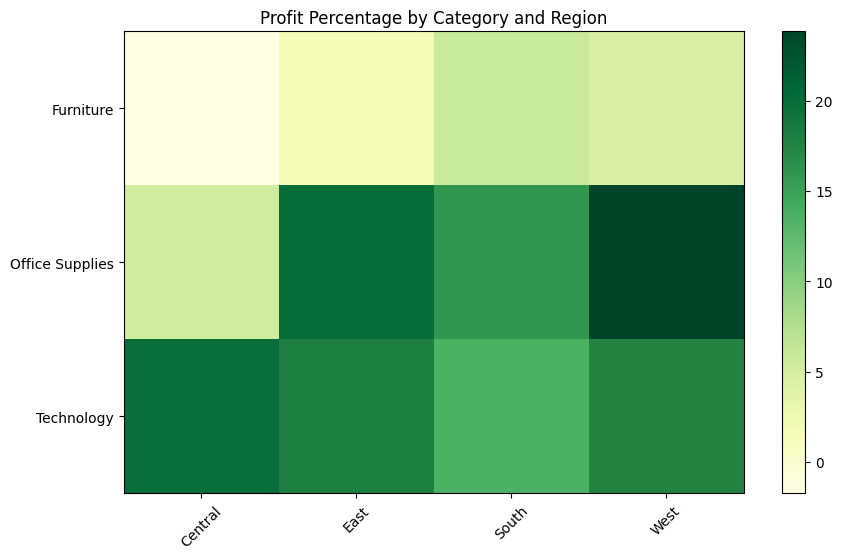

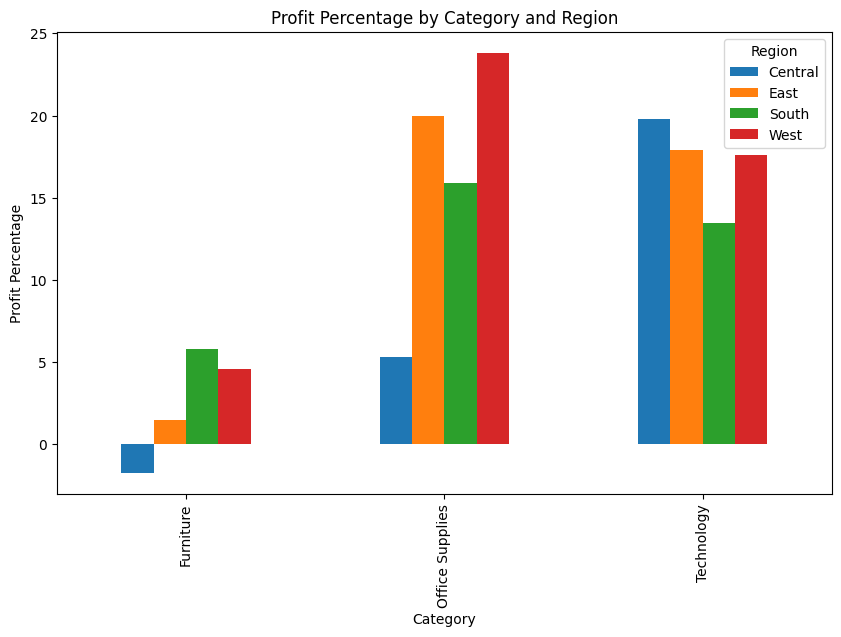

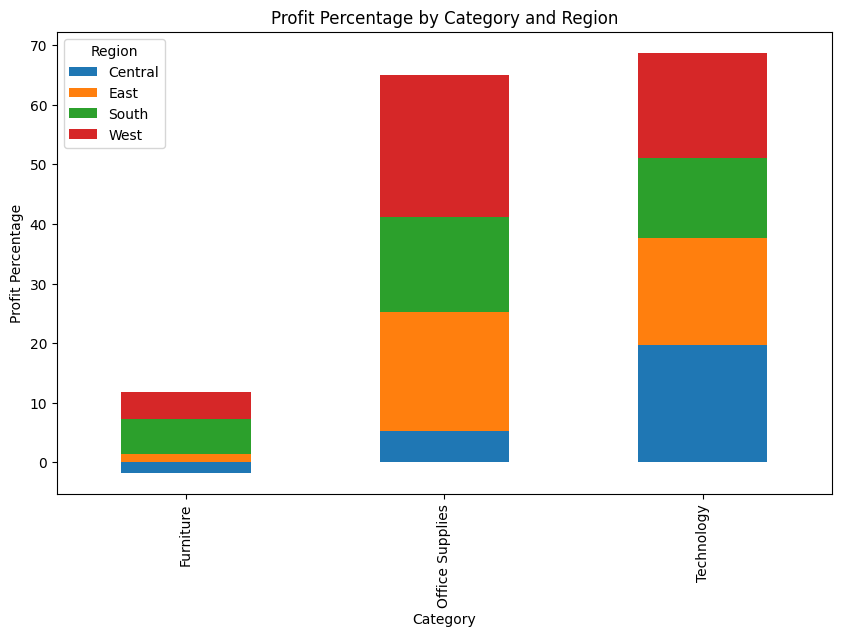

In [24]:
# Heatmap
plt.figure(figsize=(10, 6))
plt.title('Profit Percentage by Category and Region')
heatmap = plt.imshow(pivot_table, cmap='YlGn', aspect='auto')
plt.colorbar(heatmap)
plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns, rotation=45)
plt.yticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index)
plt.show()

# Grouped bar chart
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Profit Percentage by Category and Region')
plt.ylabel('Profit Percentage')
plt.xlabel('Category')
plt.show()

# Stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Profit Percentage by Category and Region')
plt.ylabel('Profit Percentage')
plt.xlabel('Category')
plt.show()

Insight dan Interpretasi: Setelah melakukan analisis dan visualisasi, tuliskan minimal dua insight yang Anda peroleh dari data tersebut. Insight dapat berupa temuan penting, pola yang menarik, tren tertentu, atau anomali dari hasil analisis. Misalnya, Anda mungkin menemukan bahwa kategori produk tertentu consistently memberikan kontribusi profit terbesar di semua region, atau ada region yang kinerjanya paling lemah untuk kategori tertentu. Jelaskan setiap insight yang diperoleh dan mengapa hal tersebut penting dari perspektif bisnis.

**INSIGHT**

1. Masalah Profitabilitas Kategori Furniture di Wilayah Central (Anomali)
    - Temuan Data: Kategori Furniture di wilayah Central adalah satu-satunya segmen yang mencatatkan kerugian (profit negatif) sebesar -2.871,05, padahal penjualannya cukup besar (163.797,16). Jika kita melihat persentase profit marginnya, nilainya adalah -1,75%. Ini sangat kontras dibandingkan region lain (East, South, West) yang semuanya berhasil mencetak profit positif untuk kategori Furniture.
    - Implikasi Bisnis: Kerugian pada kategori Furniture di wilayah Central menunjukkan adanya masalah serius dalam strategi penjualan, harga, atau biaya operasional di wilayah tersebut. Hal ini bisa berdampak negatif pada profitabilitas keseluruhan perusahaan jika tidak segera ditangani.
    - Rekomendasi Tindakan: Perusahaan perlu melakukan analisis mendalam terhadap faktor-faktor yang menyebabkan kerugian ini. Mungkin perlu meninjau kembali strategi harga, biaya logistik, atau bahkan preferensi konsumen di wilayah Central. Selain itu, kampanye pemasaran khusus atau diskon untuk kategori Furniture di wilayah ini bisa dipertimbangkan untuk meningkatkan penjualan dan mengurangi kerugian.

2. Technology sebagai "Tulang Punggung" Profitabilitas (Pola/Tren Konsisten)
    - Temuan Data: Kategori Technology secara konsisten memberikan kontribusi profit yang tinggi di semua region, dengan margin profit rata-rata yang sehat (berkisar antara 13% hingga 19%).
    - Implikasi Bisnis: Konsistensi profitabilitas ini menjadikan kategori Technology sebagai "Cash Cow" (sapi perah) utama bagi perusahaan. Keuntungan besar dari sektor ini berfungsi sebagai penyangga finansial (financial buffer) yang menutupi kinerja buruk di sektor lain (seperti Furniture di Central). Hal ini juga menunjukkan bahwa produk Technology memiliki daya saing kuat dan permintaan pasar yang stabil lintas geografis, sehingga risiko bisnis di kategori ini relatif rendah dibandingkan kategori lainnya.
    - Rekomendasi Tindakan:
        Prioritas Manajemen Stok: Pastikan ketersediaan stok (inventory levels) untuk produk Technology selalu terjaga di semua region. Kehabisan stok (stockout) di kategori ini akan sangat merugikan karena marginnya yang tinggi.
        Strategi Cross-Selling: Manfaatkan basis pelanggan Technology yang besar untuk mendongkrak penjualan kategori lain. Terapkan strategi bundling (misalnya: paket laptop + meja kerja) untuk membantu meningkatkan penjualan Furniture.
        Investasi Pemasaran: Alokasikan porsi anggaran pemasaran yang lebih besar untuk produk-produk best-seller di kategori Technology, karena Return on Investment (ROI)-nya sudah terbukti paling tinggi dan pasti.